# <span style="font-weight: bold;">군집분석 (Cluster Analysis)</span>

## <span style="font-weight: bold;"> 1.라이브러리 로드</span>

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action="ignore")

# 데이터 정규화 패키지
from sklearn.preprocessing import StandardScaler

# 군집분석 관련 패키지
from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.metrics import silhouette_score

# 차원축소를 위한 패키지
from sklearn.decomposition import PCA

# 유사도 측정 관련 패키지
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 그래프의 style을 'seaborn-whitegrid'로 설정
plt.style.use(["seaborn-whitegrid"])

# 마이너스 기호(-) 깨짐 방지
matplotlib.rcParams["axes.unicode_minus"] = False

# 한글 폰트 사용하기
plt.rc("font", family="Malgun Gothic")

## <span style="font-weight: bold;"> 2.군집분석 (Cluster Analysis)</span>

### <span style="font-weight: bold;"> 2-1. 군집분석이란?</span>
- <span style="font-weight: bold;">Y값이 없는 상황에서 사용하는 비지도학습 (Unsupervised learning) 기법</span>
- <span style="font-weight: bold;">특정 기준에 따라 데이터 포인트들을 그룹화하여 분석</span>

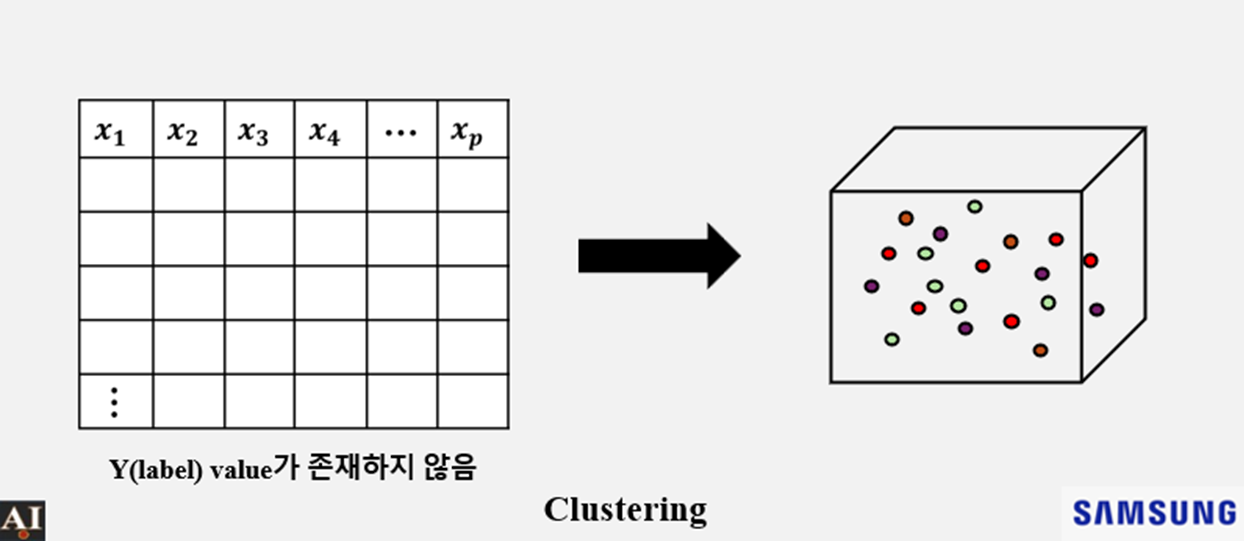

### <span style="font-weight: bold;"> 2-2. Similarity measure</span>
- <span style="font-weight: bold;">Similarity measure란 데이터 포인트들을 그룹화하는 기준으로, 기준이 되는 measure에 따라 군집화의 결과가 상이</span>

#### <span style="font-weight: bold;"> 2-2-1. Distance-based</span>
- <span style="font-weight: bold;">데이터 포인트들 간의 물리적 거리를 측정하여 유사성을 판단하며, 거리가 가까울수록 유사도가 높음 </span>

##### <span style="font-weight: bold;"> (1)Euclidean distance</span>
- <span style="font-weight: bold;">모든 차원에서 데이터 포인트 간의 차이를 제곱하여 더한 후、제곱근을 구하는 방식</span>
- <span style="font-weight: bold;">모든 특성이 동일한 스케일을 가지는 연속형 데이터에 적합</span>

<span style="font-weight: bold; font-family: 'Times New Roman'; color: white;"> $$ d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$</span>

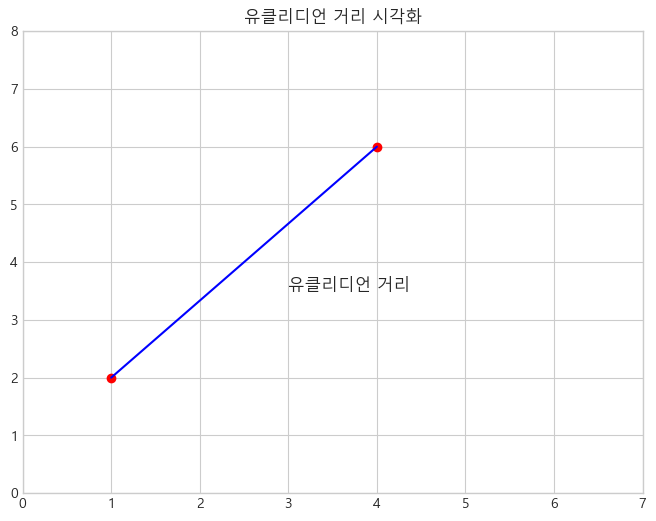

In [3]:
# 두 점 사이의 유클리드 거리 계산
point1 = np.array([1, 2])
point2 = np.array([4, 6])

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color="red")
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color="blue")
plt.text(3.0, 3.5, "유클리디언 거리", fontsize=12)
plt.title("유클리디언 거리 시각화")
plt.grid(True)


plt.xlim(0, 7)
plt.ylim(0, 8)

plt.show()

##### <span style="font-weight: bold;"> (2)Manhattan distance</span>
- <span style="font-weight: bold;">두 점 사이의 각 축에 따른 절대 거리를 합산하여 계산</span>
- <span style="font-weight: bold;">직교하는 형태의 데이터를 처리할 때 적합 </span>

<span style="font-weight: bold; font-family: 'Times New Roman'; color: white;"> $$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$</span>

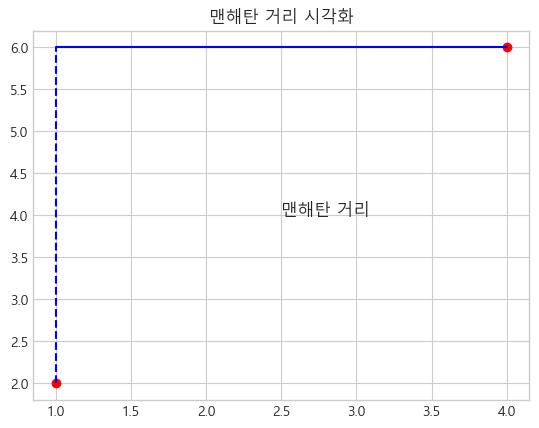

In [4]:
# 두 점 사이의 맨해탄 거리 계산
plt.figure()
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color="red")
plt.plot([point1[0], point1[0]], [point1[1], point2[1]], color="blue", linestyle="--")
plt.plot([point1[0], point2[0]], [point2[1], point2[1]], color="blue")
plt.text(2.5, 4, "맨해탄 거리", fontsize=12)
plt.title("맨해탄 거리 시각화")
plt.grid(True)
plt.show()

##### <span style="font-weight: bold;"> (3)Mahalanobis distance</span>
- <span style="font-weight: bold;">데이터의 분포와 상관성을 반영한 거리로 각 데이터 포인트 간의 거리를 공분산 행렬을 고려하여 측정</span>
- <span style="font-weight: bold;">서로 다른 스케일을 가지거나 상관관계가 있는 변수들이 있는 데이터에 적합 </span>

<span style="font-weight: bold; font-family: 'Times New Roman'; color: white;"> $$d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)}$$</span>

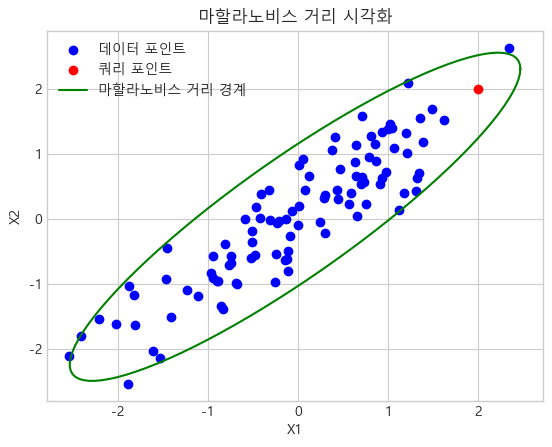

In [5]:
# 데이터 생성
np.random.seed(0)
data = np.random.multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]], size=100)
mean = np.mean(data, axis=0)
cov_matrix = np.cov(data, rowvar=False)

# 마할라노비스 거리 계산
point = np.array([2, 2])
mahal_dist = mahalanobis(point, mean, np.linalg.inv(cov_matrix))

# 시각화
plt.figure()
plt.scatter(data[:, 0], data[:, 1], color="blue", label="데이터 포인트")
plt.scatter(point[0], point[1], color="red", label="쿼리 포인트")

# 95% 신뢰 구간을 위한 타원 그리기
chi2_val = chi2.ppf(0.95, df=2)
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.sqrt(chi2_val) * np.array([np.cos(theta), np.sin(theta)])
ellipse = np.dot(np.linalg.cholesky(cov_matrix), circle) + mean[:, np.newaxis]

plt.plot(ellipse[0, :], ellipse[1, :], label="마할라노비스 거리 경계", color="green")

plt.title("마할라노비스 거리 시각화")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

#### <span style="font-weight: bold;"> 2-2-2. Similarity-based</span>
- <span style="font-weight: bold;">데이터 포인트들 간의 방향이나 집합적 특성을 비교하여 유사성을 판단 </span>

##### <span style="font-weight: bold;"> (1)Cosine similarity</span>
- <span style="font-weight: bold;">두 벡터 간의 코사인 각도를 계산하여 유사성을 측정하며, 벡터가 이루는 각도가 작을수록 유사도가 높음</span>
- <span style="font-weight: bold;">텍스트 데이터와 같이 방향성이나 빈도 기반 분석이 중요한 경우에 적합</span>

<span style="font-weight: bold; font-family: 'Times New Roman'; color: white;"> $$\text{cosine similarity} = \frac{x \cdot y}{\|x\| \|y\|}$$</span>

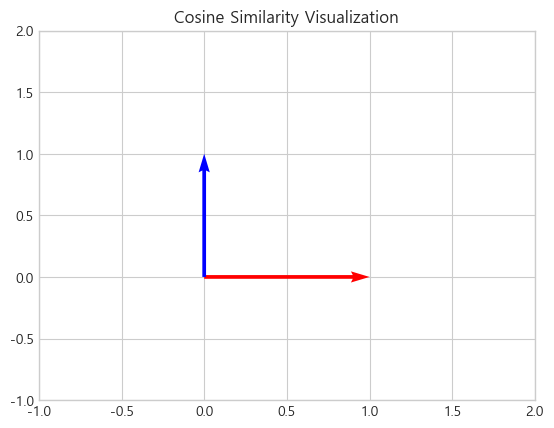

In [6]:
# 두 벡터 정의
vector1 = np.array([1, 0])
vector2 = np.array([0, 1])

plt.figure()
plt.quiver(
    0, 0, vector1[0], vector1[1], angles="xy", scale_units="xy", scale=1, color="r"
)
plt.quiver(
    0, 0, vector2[0], vector2[1], angles="xy", scale_units="xy", scale=1, color="b"
)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.title("Cosine Similarity Visualization")
plt.grid(True)
plt.show()

##### <span style="font-weight: bold;"> (2)Jaccard similarity</span>
- <span style="font-weight: bold;">두 집합 간의 교집합 크기를 합집합 크기로 나눈 비율을 사용하여 유사성을 측정</span>
- <span style="font-weight: bold;">이진형 데이터나 집합 기반의 데이터 가 있는 경우에 적합</span>

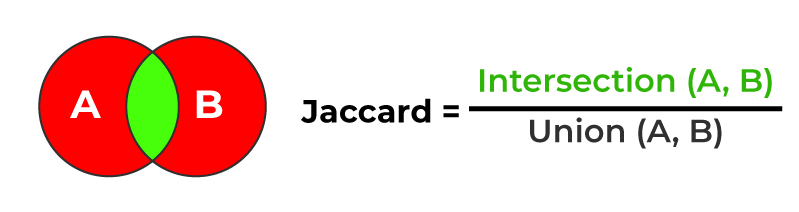

#### <span style="font-weight: bold;"> 2-2-3. Density-based</span>
- <span style="font-weight: bold;">특정 반경 내 데이터 포인트의 밀집도를 고려하여 유사성을 판단하며, 밀도가 높은 지역을 중심으로 군집이 형성 </span>
- <span style="font-weight: bold;">복잡한 형태의 클러스터나 노이즈가 많은 데이터에 적합 </span>

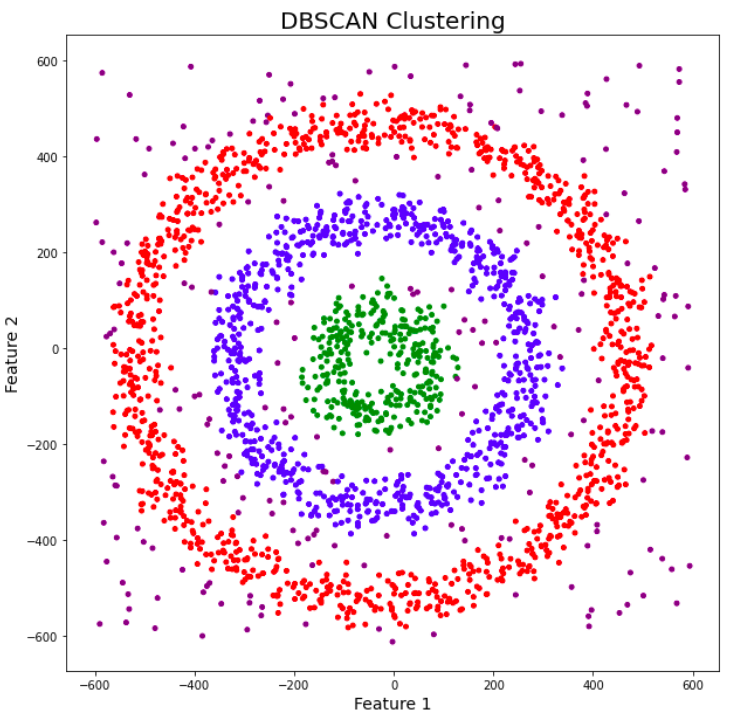

### <span style="font-weight: bold;"> 2-3. Evaluation metrics</span>
- <span style="font-weight: bold;">군집화의 성능을 평가하기 위한 지표</span>

#### <span style="font-weight: bold;"> 2-3-1. Silhouette Score</span>
- <span style="font-weight: bold;">Silhouette Score는 각 데이터 포인트가 자신의 클러스터 내에서 얼마나 잘 어울리는지와 다른 클러스터와 얼마나 잘 구분되는지를 평가 </span>
- <span style="font-weight: bold;">-1에서 1 사이의 값을 가지며, 1에 가까울수록 더 나은 군집화 결과를 의미 </span>
 <span style="font-weight: bold; font-family: 'Times New Roman'; color: white;">$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$</span>

#### <span style="font-weight: bold;"> 2-3-2. SSE (Sum of Squared Error)</span>
- <span style="font-weight: bold;">Sum of Squared Error는 클러스터 내의 데이터 포인트들이 군집 중심으로부터 얼마나 가까운지를 측정하는 지표로 SSE 값이 작을수록 클러스터 내 응집도가 높다는 것을 의미 </span>
- <span style="font-weight: bold;">-1에서 1 사이의 값을 가지며, 1에 가까울수록 더 나은 군집화 결과를 의미 </span>
 <span style="font-weight: bold; font-family: 'Times New Roman'; color: white;">$$p(x|\lambda) = \sum_{i=1}^{k} \phi_i \mathcal{N}(x|\mu_i, \Sigma_i)$$</span>

## <span style="font-weight: bold;"> 3.군집화 예시</span>

### <span style="font-weight: bold;"> 3.1 랜덤 데이터 생성</span>

In [7]:
# 데이터를 무작위로 생성
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

### <span style="font-weight: bold;"> 3.2 산점도 시각화 함수</span>

In [8]:
# 2차원 평면공간에 주어진 dataset에 대한 산점도를 시각화하는 함수
def plot_data(dataset, position, title):
    X, y = dataset  # 2차원 배열로 X는 데이터 포인트에 대한 튜플, y는 label
    plt.subplot(position)  # 매개변수 position 자리에 오는 argument의 위치에 subplot을 그림
    plt.title(title)  # plot의 제목을 매개변수 title 자리에 오는 argument로 설정
    plt.scatter(X[:, 0], X[:, 1])  # 2개의 X변수를 사용하여 산점도를 시각화

### <span style="font-weight: bold;"> 3.3 다양한 형태의 군집화</span>

In [9]:
# 다양한 형태의 군집화 결과
circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state
)  # factor는 내부와 외부 원의 크기 비율을 설정하는 파라미터
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

### <span style="font-weight: bold;"> 3.4 결과 시각화</span>

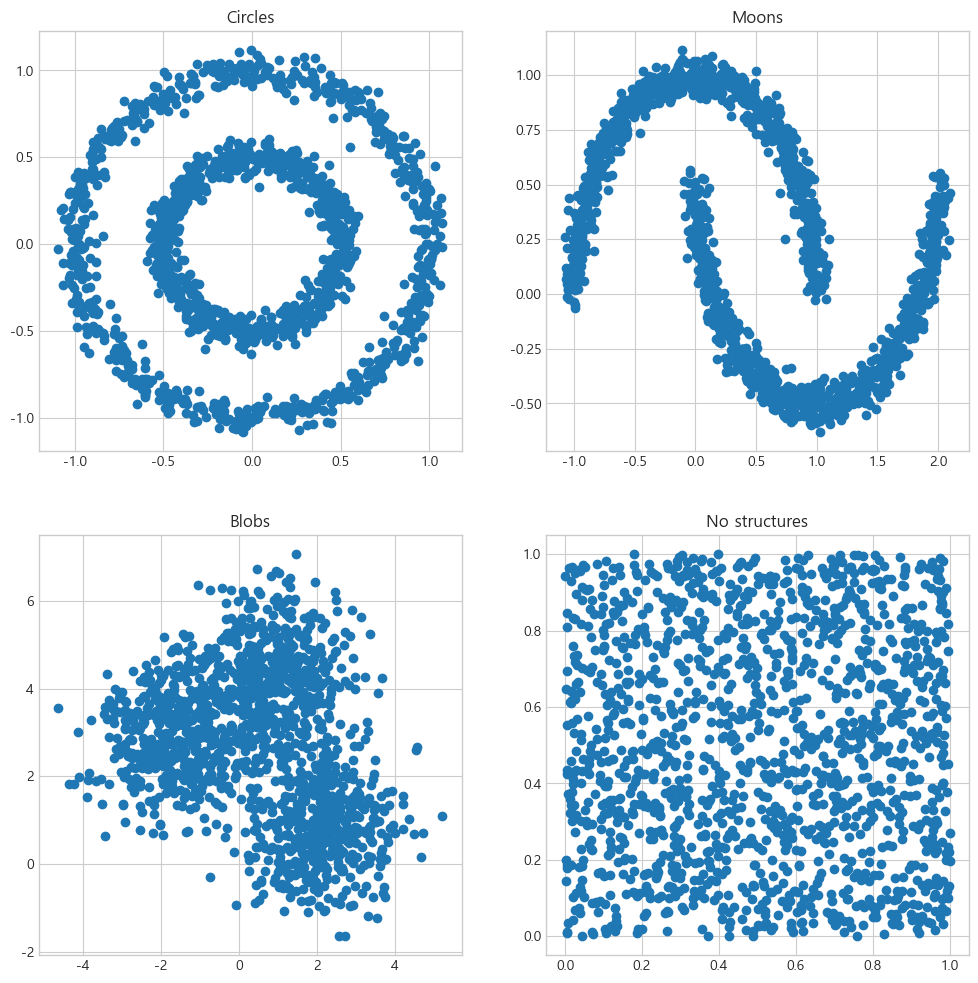

In [10]:
plt.figure(figsize=(12, 12))
plot_data(circles, 221, "Circles")
plot_data(moons, 222, "Moons")
plot_data(blobs, 223, "Blobs")
plot_data(no_structures, 224, "No structures")